
# Notebook 4: Descriptive Statistics

*Developed by Johannes Haas and Raoul Collenteur, Institute of Earth Sciences, NAWI Graz Geocenter, University of Graz.*

### Content of this lecture
- repetition of previous lecture
- some pointers on file types
- basic statistics
- correlations
- fitting linear functions



In [2]:
# Import the python packages needed in this session
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Repeating last week
### 1a. Functions
Last week we looked into functions, reusable sequences of Python code that can be used to perform a certain task multiple times. Let's look at these once again.

In [3]:
def multiply2(a, b=2):
    val = a * b
    return val

print(multiply2(5)) # No need to fill in the value b
print(multiply2(5, 3)) # But we still can

10
15


### 1b. Reading CSV files

There are many ways to read CSV files. The most widely used and most important one for our purposes is `read_csv()` from the [pandas](http://pandas.pydata.org/) package.
`CSV` stands for *comma separated value(s)*, meaning that your csv file is just a text file (`.txt`) with a comma separating the values. E.g.:

    apples,  USD, 5.99
    oranges, USD, 7.99
    bananas, USD, 3.99

However, keep in mind that this, like most things in IT, follows US standards!
For Austria, where we are using the `,` as a decimal point, using the comma also as a separator would cause confusion:

    Äpfel,   EUR, 5,36
    
So in Austria, the semicolon `;` tends to get used as the separator.
Since the csv file is just a text file, this does not really matter, however, you have to remember that you have to specify these things, using the `sep=` and `decimal=` options.

# 2. Some pointers on file types




### 2a. Common file types

If you look around on your computer, you'll find various files, generally marked by a symbol/icon and their file extension. E.g a page of paper with a "W" and the ending `.doc` or `.docx` is a word file, if that "W" is an "X" and it ends with `.xls` or `.xlsx`, it's an excel file, and so on.

So normally, you just doubleclick a file, and windows knows what to do with it, and thanks to the icon, you know what's likely going to happen ("W" indicates that word will start...). However, this system has some limitations:
When you change the file ending, you don't necessarily change the file. And icons that point to specific applications can hide the fact that there's also other applications that can open said files.
And as you have already realized, windows sometimes gets confused when saving files from the internet or when opening files it does not know. E.g. when Edge tries to save our notebooks as `.htm` or when you try to open our `.ipynb` files with a simple doubleclick.
So this simple principle offers some pitfalls, when you venture away from the small bunch of standard MS-Office files or when you are working with files that can be opened with many different applications.

There are various ways to improve this situation such as "[magic numbers](https://en.wikipedia.org/wiki/Magic_number_(programming))" and the use of metadata. However, for our use case, the file extension and a bit of thinking will work.

### 2b. text files

Most of the files we are using are just simple text files.
The CSV files from the previous lecture, are nothing more than a text file (`.txt`) with a different file extension (`.csv`) and a few rules for its formatting.
Similarly, the jupyter notebook is also just a simple text file, but with the ending `.ipynb` and certain rules that govern its structure.


    {
     "cells": [
      {
       "cell_type": "markdown",
       "metadata": {},
       "source": [
        "\n",
        "# Notebook 4: Descriptive Statistics\n",
        "\n",
        "*Developed by Johannes Haas and Raoul Collenteur, Institute of Earth Sciences, NAWI Graz Geocenter, University of Graz.*\n",
        "\n",
        "### Content of this lecture\n",
        "- repetition of previous lecture\n",
        "- some pointers on file types\n",
        "- basic statistics\n",
        "- correlations\n",
        "- fitting linear functions\n",
        "\n"
       ]
      },
      {
       "cell_type": "code",
       "execution_count": 2,
       "metadata": {},
       "outputs": [],
       "source": [
        "# Import the python packages needed in this session\n",
        "import numpy as np\n",
        "import pandas as pd\n",
        "import matplotlib.pyplot as plt\n",
        "%matplotlib inline"
       ]
      },

The *code* above is just the first two cells of this notebook, opened in a text editor.
You can probably already read quite a bit of this code, applying what you have learned so far, even though you probably don't know the *language* it is written in.

For just editing the notebook, a text editor works just as well as our browser, but we have to deal with much more formatting commands and we can not work with the python parts interactively.

# 3. Basic Statistics

What basic statistics have we already done so far? Let us look at a few common statistics contained in the Numpy package. We first create an array of 100 random values using the `random` subpackage of Numpy.

In [4]:
# Let's first create a array of 100 random values between 0 and 1
values = np.random.rand(100)
print("The type of the variable 'values' is", type(values))

The type of the variable 'values' is <class 'numpy.ndarray'>


In [5]:
# Let's print a couple of values in this array to see what we are dealing with
values[0:5]

array([0.87886178, 0.86632576, 0.24718485, 0.7661573 , 0.1126383 ])

In [6]:
print("The mean of values is:", np.mean(values))
print("The standard deviation of values is:", np.std(values))
print("The minimum of values is:", np.min(values))
print("The maximum of values is:", np.max(values))

The mean of values is: 0.5179582296115736
The standard deviation of values is: 0.31572564805089276
The minimum of values is: 0.005730974832147351
The maximum of values is: 0.9981684317825271


Two, very basic things are still missing: The median and the mode. 

### 3a. The median

While the mean is the mean value of all the values, the median is the middle value of all sorted values.
Or in other words: 50% of samples are smaller and 50% of samples are larger than the median.
Lets construct some semi-random values to illustrate the point:

In [7]:
ICData = np.array([100, 200, 500, 500, 50, 250, 500, 600, 400, 100000,
                   1000, 10, 250, 400, 600, 300, 500, 300, 500, 400])

In [8]:
ICData

array([   100,    200,    500,    500,     50,    250,    500,    600,
          400, 100000,   1000,     10,    250,    400,    600,    300,
          500,    300,    500,    400])

Getting the mean is straightforward, both per hand, or with the inbuilt python function.

In [9]:
HandMean = sum(ICData) / len(ICData)
PyMean = ICData.mean()
print('The mean calculated the \"hard" way is', HandMean, 'whereas the mean from the inbuilt method is', PyMean)

The mean calculated the "hard" way is 5368.0 whereas the mean from the inbuilt method is 5368.0


Getting the median is as easy, we just need a new function, `np.sort()`.

In [10]:
# sort the values first:
ICSorted = np.sort(ICData)
# find the middle one
middle = len(ICSorted) / 2
middle = int(middle)
median = ICSorted[middle]
print(median)

400


Or, we can simply use the inbuilt function, similar (but different) from our already known `mean` function.

In [11]:
print('median:', np.median(ICSorted))
print('mean:', ICSorted.mean())

median: 400.0
mean: 5368.0


Now, what's the difference between the two values?

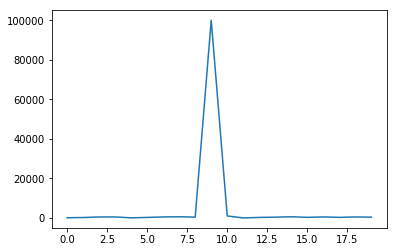

In [12]:
plt.plot(ICData)

(array([19.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.0000e+01, 1.0009e+04, 2.0008e+04, 3.0007e+04, 4.0006e+04,
        5.0005e+04, 6.0004e+04, 7.0003e+04, 8.0002e+04, 9.0001e+04,
        1.0000e+05]),
 <a list of 10 Patch objects>)

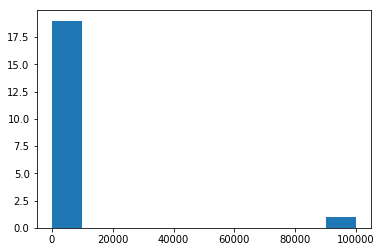

In [13]:
plt.hist(ICData)

### 3b. The mode

The mode (*Modalwert* or also *Modus* in German) is the value with the most occurences in a dataset.

In [14]:
ICSorted

array([    10,     50,    100,    200,    250,    250,    300,    300,
          400,    400,    400,    500,    500,    500,    500,    500,
          600,    600,   1000, 100000])

For such a simple dataset, it's quite easy to count it by hand, but you can imagine that it will easily become a lot of work to implement an algorithm for it. 
We actually need another package for it, since it is not included in the standard numpy.

In [15]:
from scipy import stats

In [16]:
mode = stats.mode(ICSorted)
print(mode)

ModeResult(mode=array([500]), count=array([5]))


### 3c. The Bell Curve/Normal Distribution

*Mostly called Gauß-Verteilung in German*

We have already worked with principles such as *mean* and the *standard deviation* that we applied to random values.
However, most processes in nature are not really totally random, but follow certain probability density functions, with the most well known one being the [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) or [Gauß-Verteilung](https://de.wikipedia.org/wiki/Normalverteilung) in German, with its characteristic bell shape.

In the following code cells, we are going to produce such a dataset and figure out what this bell shape means.

First, we have to produce a random dataset, that follows the normal distribution:

In [17]:
GaussData = np.random.normal(10, 5, 1001)

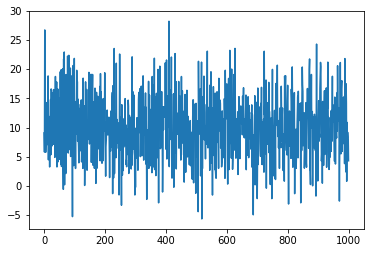

In [18]:
plt.plot(GaussData)

As you can clearly see, your data does not looks very bell-like.
In order to turn it into the bell, we do not have to plot the values, but their counts!
Again, `matplotlib`, which we have imported at the beginning, is there to help:


(array([ 10.,  29., 112., 185., 262., 217., 116.,  49.,  19.,   2.]),
 array([-5.68532979, -2.29101116,  1.10330747,  4.4976261 ,  7.89194473,
        11.28626336, 14.68058199, 18.07490062, 21.46921925, 24.86353788,
        28.25785651]),
 <a list of 10 Patch objects>)

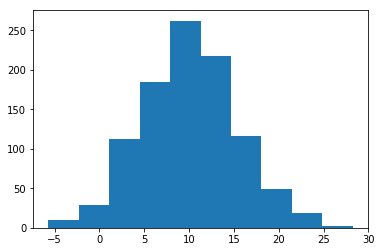

In [19]:
plt.hist(GaussData)

Ypu can probably already already start to see some kind of bell shape. However, the bins we have used to sort our data have been decided by matplotlib, and they are not really the ideal size.
Check out the documentation for `plt.hist()` (either with the `?` feature or [online](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html)) and replot the chart above with a bin size of 2.

In [20]:
bins = np.arange(-5,26,2)

In [21]:
bins

array([-5, -3, -1,  1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25])

(array([  4.,  14.,  18.,  50.,  86., 109., 142., 150., 142., 119.,  72.,
         37.,  28.,  20.,   6.]),
 array([-5, -3, -1,  1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25]),
 <a list of 15 Patch objects>)

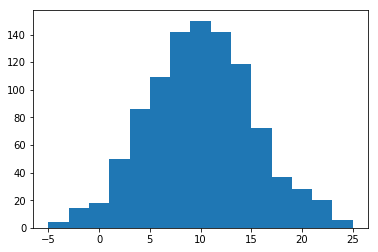

In [22]:
plt.hist(GaussData, bins)

While the data did not change, the distribution is likely a bit clearer now.
Now we can also see what the `10` and `5` in our intial setup (`GaussData = np.random.normal(10, 5, 1000)`) meant.
We have used the mean and the standard deviation as an input to produce a *random* normal distribution.

In [23]:
mu = GaussData.mean()
print('the mean is', mu)

the mean is 10.055578000977258


In [24]:
sigma = GaussData.std()
print('the standard deviation is', sigma)

the standard deviation is 5.306970474569427


The standard deviation (mostly abbreviated with $\sigma$) has a particular meaning for the normal distribution:
about 68.3 % of all samples are within $\pm \sigma$ from the mean.

### Excercise:

Write a small script to figure out how many of our samples are indeed in the $\pm \sigma$ interval, using what you learned in the last lectures (loops and conditional statements):

In [25]:
# hint: you can count things by initializing a counter and adding to it in a loop
valueCounter = 0
for number in GaussData:
    valueCounter = valueCounter + 1
print('valueCounter =', valueCounter)

valueCounter = 1001


In [26]:
withinSigma = 0
outsideSigma = 0
for sample in GaussData:
    if (sample < (mu + sigma)) & (sample > (mu - sigma)):
        withinSigma = withinSigma + 1
    else:
        outsideSigma += 1
        
print('samples within one std from mean:', withinSigma)
print('samples outside one std from mean:', outsideSigma)
print((withinSigma /(len(GaussData) / 100)), '% of samples are within one std from the mean.')

samples within one std from mean: 685
samples outside one std from mean: 316
68.43156843156844 % of samples are within one std from the mean.


### 3d. Some more examples for probability distributions

Our first example of the student incomes might be a tad extreme, but it does reflect the general distribution of incomes, where small and medium incomes tend to be the most common occurences, whereas high incomes are rarer, but can easily be extremely high.
This is called a left skewed distribution (*linksschiefe Verteilung*).
A right skewed distribution would be something where low and middle values tend to be rare, whereas the high values are the most likely occurence. 
A classic example for such a distribution would be the ages where people die (in wealthy countries).
Infant mortality is quite low, and by far most kids survive their youth and teens and adults generally live a very safe live until they die from high age.

The **normal distribution** we have plotted above is often relevant for the *results* of natural or machined processes.
E.g. the distribution of biological traits (intelligence, height...) or manufacturing tolerances.

The **gamma distribution** is relevant for hydrology, as most precipitation values tend to cluster around a (low) mode, but the distribution has a very long tail. 

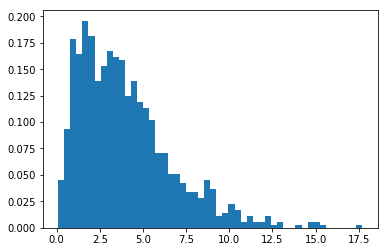

In [27]:
# example for a gamma distribution
s = np.random.gamma(2, 2, 1000)
count, bins, ignored = plt.hist(s, 50, density=True)

# 4. Correlations

The correlation and thus the correlation coefficient is a measure for how similar two samples *behave*.
[E.g if you notice a lot of storks in a town and you also notice that there are a lot of babies, the number of storks and the number of babies might be correlated.](http://www3.math.uni-paderborn.de/~agbiehler/sis/sisonline/struktur/jahrgang21-2001/heft2/Langfassungen/2001-2_Matth.pdf) Another example mentioned in this short paper is an obvious correlation between shoe sizes and reading ability.
The bigger a shoe size, the better a person can read.
So if you want to have a child, move to where the storks are and if you have issues reading these notebooks, buy bigger shoes...

### 4a. Correlation != Causation

While correlations can help to identify a causation, a high correlation alone is not a garantee for a causation.

### 4b. Calculating the correlation

Lets introduce some sample data from [this book](https://unikat.uni-graz.at:443/UGR:Gesamtbestand:UGR_alma21299366760003339).

In [28]:
X = np.array([2, 4, 5, 6, 4, 7, 8, 5, 6, 7])
Y = np.array([3, 2, 6, 5, 3, 6, 5, 4, 4, 5])

The Pearson correlation coefficient (a measurement for the correlation) generally called $r$, is calculated as follows:

Eq.1 $$ r = \frac{n \sum{XY} - \sum{X}\sum{Y}}{\sqrt{[n\sum{X^2}-(\sum{X})^2][n\sum{Y^2} - (\sum{Y})^2]}} $$

While this at first looks like a lot of work (and doing it by hand, it is), all of the needed sums are quite straightforward in python.

In [29]:
Xsum = sum(X)
Ysum = sum(Y)
Xsquared = X**2
Ysquared = Y**2
Xsqsum = sum(Xsquared)
Ysqsum = sum(Ysquared)
X_Y = X * Y
X_Ysum = sum(X_Y)
n = len(X)

Of course this could also be shortened by chaining functions. `Xsqsum` would also be correct with `Xsqsum = sum(X**2)`.
With all the variables set, it should be a quite straightforward typing work.

### Exercise:

Calculate r, following Equation 1 above.

In [31]:
# hint: don't forget the correct positions of the brackets. 
# The sqaure brackets in the original formula are just for easy reading and don't work as normal brackets in python!
r = 

SyntaxError: invalid syntax (<ipython-input-31-370a6fc9495a>, line 3)

In [32]:
r = (n * X_Ysum - Xsum * Ysum) / np.sqrt((n * Xsqsum - Xsum**2) * (n * Ysqsum - Ysum**2))
print(r)

0.6921330813196407


Again, there is a shortcut in python:

In [33]:
np.corrcoef(X,Y)

array([[1.        , 0.69213308],
       [0.69213308, 1.        ]])

### 4c. Correlating real data

As you have learned last lecture, you can easily read csv data with pandas.
Please download the groundwater levels (*Grundwasserstand-Monatsmittel*) for well `314922` and the water levels (*W-Tagesmittel*) for river gauge `211136` from [ehyd.gv.at](https://ehyd.gv.at) and save them as `well.csv` and `river.csv`.
As you can clearly see, one is monthly data, whereas the other one is daily data, so we not only have to read them, but we also have to resample them.


In [34]:
# Since ehyd data has some very questionable format decisions, we have to give read_csv quite a lot of help to get started
wellData = pd.read_csv('well.csv', sep = ';', skiprows=34, skipfooter=1, usecols=[0,1], index_col=0, parse_dates=True, dayfirst=True, names=['','level'], decimal = ',')
riverData = pd.read_csv('river.csv', sep = ';', skiprows=23, skipfooter=1, index_col=0, parse_dates=True, dayfirst=True, names=['level'], decimal = ',')

C:\Program Files\Anaconda_Python_3.7\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  
C:\Program Files\Anaconda_Python_3.7\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
riverData.head()

,level
1976-01-02,204
1976-01-03,204
1976-01-04,204
1976-01-05,201
1976-01-06,203


In [36]:
wellData.head()

,level
,
1968-02-01,624.15
1968-03-01,624.27
1968-04-01,624.83
1968-05-01,624.87
1968-06-01,624.99


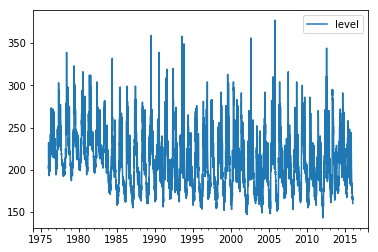

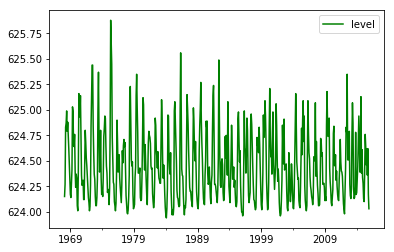

In [37]:
riverData.plot()
wellData.plot(style='g')

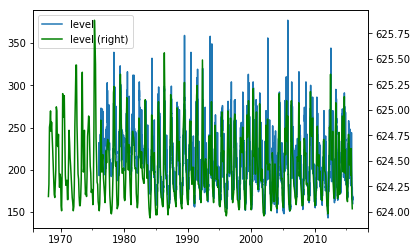

In [38]:
ax=riverData.plot()
wellData.plot(ax=ax, style='g', secondary_y=True)

In order to resample the data (=changing its time frequency), we first have to figure out how we want to resample it. So we check the heads of the data.

In [39]:
print(wellData.head())
print(riverData.head())

             level
                  
1968-02-01  624.15
1968-03-01  624.27
1968-04-01  624.83
1968-05-01  624.87
1968-06-01  624.99
            level
1976-01-02    204
1976-01-03    204
1976-01-04    204
1976-01-05    201
1976-01-06    203


We have to resample our river data from daily data to monthly data, set to the beginning of the month.
Also, for river data, we want a monthly average, and not a sum, so we have to feed some arguments to the resample function.

In [40]:
riverMonthly = riverData.resample('MS').mean()

In [41]:
riverMonthly.head()

,level
1976-01-01,203.633333
1976-02-01,202.413793
1976-03-01,204.806452
1976-04-01,228.933333
1976-05-01,253.000000


So now we can calculate a correlation coefficient?

In [42]:
np.corrcoef(riverMonthly, wellData)

C:\Program Files\Anaconda_Python_3.7\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Program Files\Anaconda_Python_3.7\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Program Files\Anaconda_Python_3.7\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

The numpy correlation function only works for arrays of the same dimension. So we need to cut them to size and make sure to anly adress our data, and not the times.
So we have to figure out the minimum and maximum times of the timeseries and cut them to that size.

In [43]:
print(wellData.index.min())
print(wellData.index.max())
print(riverMonthly.index.min())
print(riverMonthly.index.max())

1968-02-01 00:00:00
2015-12-01 00:00:00
1976-01-01 00:00:00
2015-12-01 00:00:00


In [44]:
wellCut = wellData['1976':'2015']
print(len(wellCut))
print(len(riverMonthly))

480
480


While they now have the same length, there are still some issues:

In [45]:
wellCut.shape

(480, 1)

In order to be able to calculate a correlation coefficient, we need to turn the dataframe into a numpy array and reduce its dimensions.

In [46]:
X_well = wellCut.values.squeeze()
Y_river = riverMonthly.values.squeeze()

In [47]:
X.shape

(10,)

In [48]:
np.corrcoef(X_well,Y_river)

array([[1.        , 0.91195783],
       [0.91195783, 1.        ]])

As you see, getting this simple and important information was a lot of work.
So you can probably already guess what's coming next:
Of course there is a shortcut for it.
We simply have to run the `corrwith()` function or we have to combine our dataframes and run the `.corr()` function. 
Pandas will even take care of the different lengths.


In [49]:
# concatenate the dataframes (we have to resample manually though) and tell pandas on which axis to concatenate
corrDataframe = pd.concat([wellData, riverMonthly], axis=1)

In [50]:
# get the correlation coefficient
corrDataframe.corr()

,level,level
level,1.000000,0.911958
level,0.911958,1.000000


In [51]:
# or, with keeping the dataframes as they are
wellData.corrwith(riverMonthly)

level    0.911958
dtype: float64

# 5. Exercises

### Some basic statistics for real data

Use pandas to obtain some basic statistics for `wellData` and `riverData`, so that you can **produce some output in the cell below:**


In [52]:
print('The well Apfelberg (HZB 314922) has a mean waterlevel of', wellMean, 'meters, a median of', wellMedian, 'meters and a mode of', wellMode)
print('The gauge Zeltweg (HZB 211136) has a mean waterlevel of', riverMean, 'cm, a median of', riverMedian, 'cm and a mode of', riverMode)

NameError: name 'wellMean' is not defined

Since you might have made some changes to your variables `wellData` and `riverData`, it's probably a good idea to reimport the data, before you start the exercise. Also, the pandas documentation (especially the [user guide](http://pandas.pydata.org/pandas-docs/stable/user_guide/index.html)) is quite good.

In [53]:
wellMean = wellData.mean()
wellMedian = wellData.median()
wellMode = wellData.mode()
riverMean = riverData.mean()
riverMedian = riverData.median()
riverMode = riverData.mode()
wellMean = float(wellMean)
wellMedian = float(wellMedian)
wellMode = float(wellMode.squeeze())
riverMean = float(riverMean)
riverMedian = float(riverMedian)
riverMode = float(riverMode.squeeze())

In [54]:
print('The well Apfelberg (HZB 314922) has a mean waterlevel of', wellMean, 'meters, a median of', wellMedian, 'meters and a mode of', wellMode)
print('The gauge Zeltweg (HZB 211136) has a mean waterlevel of', riverMean, 'cm, a median of', riverMedian, 'cm and a mode of', riverMode)

The well Apfelberg (HZB 314922) has a mean waterlevel of 624.4560173913045 meters, a median of 624.39 meters and a mode of 624.06
The gauge Zeltweg (HZB 211136) has a mean waterlevel of 207.6039427750017 cm, a median of 204.0 cm and a mode of 201.0


In order to visualize these properties, please **plot two histograms for the data**.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000161FB241438>]],
      dtype=object)

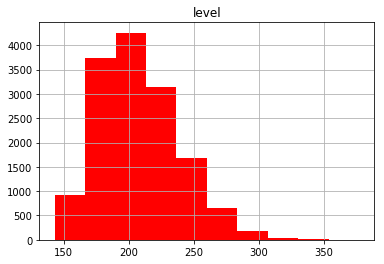

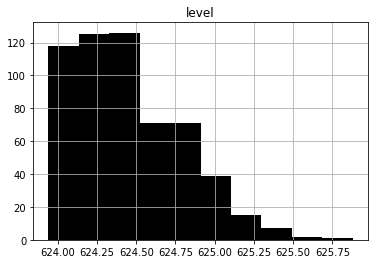

In [55]:
riverData.hist(color='r')
wellData.hist(color='k')

Use what you have learned so far (and probably the pandas documentation), to **find the years with the highes average water level** for the river gauge and the well.
Getting the year as a nice, printable `int` is quite complicated, so for this exercise, just having the correct code without an nice, printed result is OK too.

In [56]:
yearlyRiver = riverData.resample('Y').mean()
yearlyWell = wellData.resample('Y').mean()

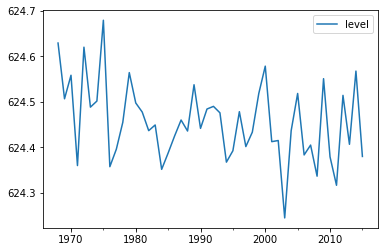

In [57]:
yearlyWell.plot()

In [58]:
# get the maximum values and their indices
wellMax = yearlyWell.max()
wellMaxIdx = yearlyWell.idxmax()
riverMax = yearlyRiver.max()
riverMaxIdx = yearlyRiver.idxmax()